In [1]:
import numpy as np
from EMRM1D import EMRM_simulator
import matplotlib.pyplot as plt


# 1). Create simulator object

In [2]:
testModel = EMRM_simulator()

# 2). Set the layered model parameters

In [3]:
# Layer thicknesses
thicknesses = np.array([1.5,1.5,200])

# dielectric constant values
eps = np.array([2.0,2.5,3.2,19.0])

# Loss tangent or conductivity values
lossOrCond = np.array([0.001,0.001,0.001,0.01])

# 0 if using conductivity, 1 if using loss tangent
useConductivity = 0

# Spacecraft altitude in meters
H = 300*1000


testModel.setModel(H,thicknesses,eps,lossOrCond,useConductivity)

# 3). Set the radar pulse

In [4]:
# Load pulse from csv file. 
timeTest, pulseTest = testModel.loadPulse('Sharad_Ideal_sourcePulse.csv')

# Set pulse
testModel.setPulse(pulseTest,timeTest)

# 4). Set the radar matched filter

In [5]:
tmfTest,fmfTest,mfTest = testModel.loadMatchFilter('Sharad_Ideal_matchedFilter.csv')

testModel.setMatchFilter(mfTest,fmfTest,tmfTest)

# 5). Set the windowing parameters

In [6]:
testModel.setWindowParam(6,15*10**6,25*10**6)

# 6). Run simulation and plot result

/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


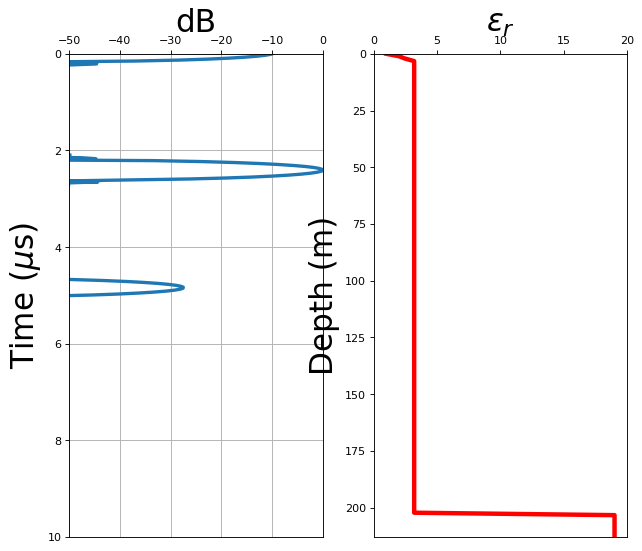

array([[-4.25000000e-05+0.00000000e+00j, -6.33095812e+01+1.93135260e+01j,
        -6.35158965e-09+2.92955741e-09j],
       [-4.24799953e-05+0.00000000e+00j, -6.02287613e+01-1.27833527e+01j,
         5.50637278e-09-8.31454710e-09j],
       [-4.24599906e-05+0.00000000e+00j, -5.85398246e+01+1.06074460e+01j,
        -1.64609960e-09+1.20006729e-08j],
       ...,
       [ 4.24599906e-05+0.00000000e+00j, -6.25952653e+01+1.94489743e+01j,
        -6.94477452e-09+3.07274482e-09j],
       [ 4.24799953e-05+0.00000000e+00j, -6.71453818e+01-1.51387414e+01j,
         1.38815174e-09-4.27795893e-09j],
       [ 4.25000000e-05+0.00000000e+00j, -6.77470708e+01-3.42831985e-02j,
         3.71854220e-09+1.94508512e-09j]])

In [7]:
testModel.plotResult=True
testModel.plotTime=10
testModel.runSim()